# Model 1 - Horizontal stratigraphic

This is the most simpel model of horizontally stacked layers. We start by importing the necessary dependencies:

In [1]:
# These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../..")
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=cpu"

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Creating the model by importing the input data and displaying it:

In [2]:
geo_data = gp.create_data([0,1000,0,1000,0,1000],resolution=[50,50,50], 
                        path_o = os.pardir+"/data/input_data/jan_models/model3_orientations.csv",
                        path_i = os.pardir+"/data/input_data/jan_models/model3_surface_points.csv") 

Active grids: ['regular']


Setting and ordering the units and series:

In [3]:
gp.map_series_to_surfaces(geo_data, {"Strat_Series": ('rock2','rock1'),"Basement_Series":('basement')})

,surface,series,order_surfaces,isBasement,color,id
0,rock1,Strat_Series,1,False,#015482,1
1,rock2,Strat_Series,2,False,#9f0052,2
2,basement,Basement_Series,1,True,#ffbe00,3


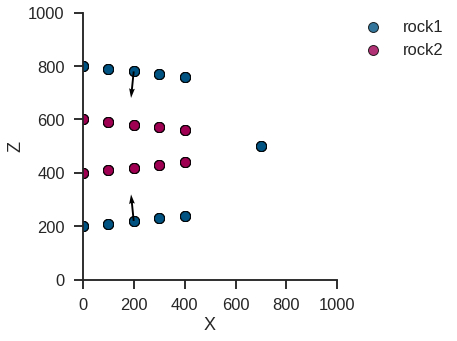

In [4]:
%matplotlib inline
gp.plot.plot_data(geo_data, direction='y')

Calculating the model:

In [10]:
interp_data = gp.set_interpolation_data(geo_data, compile_theano=True,
                                        theano_optimizer='fast_compile')

Compiling theano function...
Compilation Done!


In [6]:
from gempy.core.interpolator import InterpolatorWeights, InterpolatorScalar
geo_model = geo_data
iw = InterpolatorScalar(geo_model.surface_points, geo_model.orientations, geo_model.grid, geo_model.surfaces,
                                              geo_model.series, geo_model.faults, geo_model.additional_data)
th_f = iw.compile_th_fn()

Z_x = th_f(*geo_model.interpolator.get_python_input_block(append_control=True, fault_drift=None)[:7])

Compiling theano function...
Compilation Done!


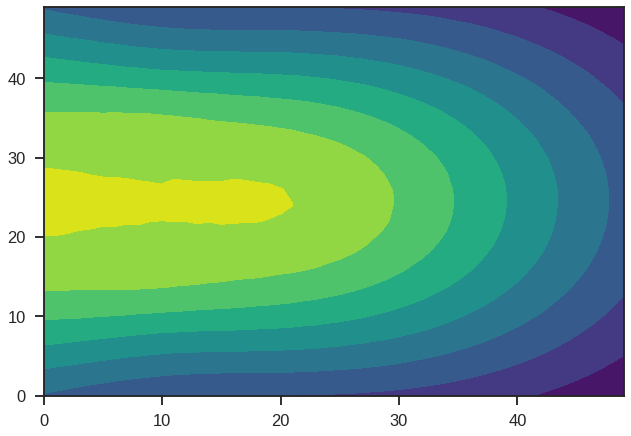

In [7]:
plt.contourf(Z_x[:125000].reshape(50,50,50).T[:,25,:], cmap='viridis')

In [8]:
a = interp_data.theano_graph.solve_kriging()
a

<gempy.core.theano.theano_graph_pro.SolveSparse object at 0x7f8872425a20>.0

In [9]:
import theano
from theano import sparse
geo_model = geo_data
input_data_T = interp_data.theano_graph.input_parameters_kriging_export

th_fn = theano.function(input_data_T,
                                interp_data.theano_graph.s(),
                                # mode=NanGuardMode(nan_is_error=True),
                                on_unused_input='ignore',
                                allow_input_downcast=False,
                                profile=False)


AttributeError: 'TheanoGraphPro' object has no attribute 's'

In [ ]:
th_fn(*geo_model.interpolator.get_python_input_block(append_control=True, fault_drift=None)[:7])

In [ ]:
break

In [ ]:
th_fn(*geo_model.interpolator.get_python_input_block(append_control=True, fault_drift=None)[:7])

In [ ]:
break

In [ ]:
break

In [11]:
sol = gp.compute_model(geo_data)

In [ ]:
%debug

In [ ]:
geo_model.interpolator.get_python_input_block(append_control=True, fault_drift=None)[:7]

In [ ]:
from gempy.core.interpolator import InterpolatorWeights
geo_model = geo_data
iw = InterpolatorWeights(geo_model.surface_points, geo_model.orientations, geo_model.grid, geo_model.surfaces,
                                              geo_model.series, geo_model.faults, geo_model.additional_data)
th_f = iw.compile_th_fn()

th_f(*geo_model.interpolator.get_python_input_block(append_control=True, fault_drift=None)[:6])

In [ ]:
interp_data.theano_graph.number_of_points_per_surface_T.get_value()

In [ ]:
sol = gp.compute_model(geo_data)

Displaying the result in x and y direction:

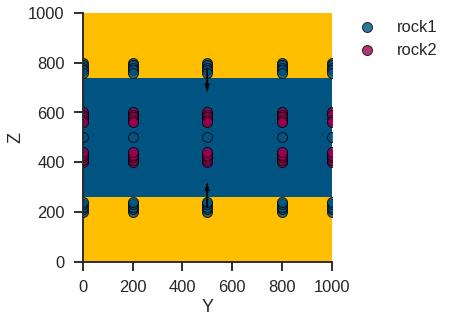

In [12]:
%matplotlib inline
gp.plot.plot_section(geo_data, cell_number=25,
                         direction='x', show_data=True)

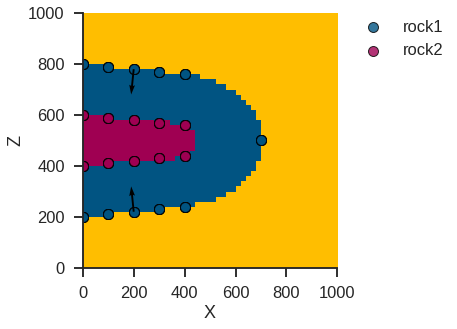

In [13]:
%matplotlib inline
gp.plot.plot_section(geo_data, cell_number=25,
                    direction='y', show_data=True)